In [1]:
images=[]
labels=[]

In [2]:
pip install opencv-python

In [3]:
import os
import cv2

In [4]:
os.listdir("C:/shivam/Datasets/mask/")

['0', '1']

In [5]:
for i in ['0', '1']:
    imageNameList=os.listdir("C:/shivam/Datasets/mask/" + str(i))
    for fileName in imageNameList:
        Image=cv2.imread("C:/shivam/Datasets/mask/" + str(i) + "/" + str(fileName))
        try:
            gray=cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
            Image=cv2.resize(gray,(100,100))
            images.append(Image)
            labels.append(i)
        except:
            pass
    print("Inside folder ", i)
        
        

Inside folder  0
Inside folder  1


In [6]:
import numpy as np

In [7]:
images=np.array(images)
labels=np.array(labels)

In [8]:
images

array([[[  9,   9,  10, ...,  21,  27,  27],
        [  8,   8,   7, ...,   8,  13,  15],
        [ 12,  10,  10, ...,   4,   4,   4],
        ...,
        [ 66,  67,  58, ...,   1,   0,   0],
        [ 66,  64,  53, ...,   2,   0,   0],
        [ 60,  56,  49, ...,   2,   0,   0]],

       [[218, 215, 212, ..., 168, 155, 152],
        [215, 212, 204, ..., 189, 183, 159],
        [201, 198, 190, ..., 162, 167, 158],
        ...,
        [ 33,  53,  70, ...,  14,  14,  15],
        [ 31,  54,  77, ...,  19,  19,  17],
        [ 33,  56,  77, ...,  25,  27,  23]],

       [[180, 173, 175, ..., 186, 163, 137],
        [178, 174, 175, ..., 174, 151, 135],
        [174, 178, 177, ..., 153, 134, 145],
        ...,
        [203, 201, 196, ..., 153, 152, 161],
        [201, 200, 195, ..., 159, 156, 159],
        [194, 196, 199, ..., 155, 166, 143]],

       ...,

       [[255, 253, 254, ..., 253, 254, 255],
        [254, 255, 255, ..., 254, 254, 255],
        [255, 255, 255, ..., 255, 255, 255

In [9]:
labels

array(['0', '0', '0', ..., '1', '1', '1'], dtype='<U1')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_features,test_features,train_target,test_target=train_test_split(images,labels,test_size=0.2)

In [12]:
train_features.shape

(1100, 100, 100)

In [13]:
train_target.shape

(1100,)

In [14]:
test_features.shape

(276, 100, 100)

In [15]:
test_target.shape

(276,)

In [16]:
def preprocessing(img):

    img=img/255
    return img

In [17]:
def square(x):
    return x**2

In [18]:
train_features=np.array(list(map(preprocessing,train_features)))

In [19]:
train_features.shape

(1100, 100, 100)

In [20]:
train_features=train_features.reshape(train_features.shape[0], train_features.shape[1],train_features.shape[2],1)

In [21]:
train_features.shape

(1100, 100, 100, 1)

In [22]:
test_features=np.array(list(map(preprocessing,test_features)))

In [23]:
test_features.shape

(276, 100, 100)

In [24]:
test_features=test_features.reshape(test_features.shape[0],test_features.shape[1],test_features.shape[2],1)

In [25]:
test_features.shape

(276, 100, 100, 1)

In [26]:
from keras.preprocessing.image import ImageDataGenerator

In [27]:
dataGenerator=ImageDataGenerator(width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1,rotation_range=10)

In [28]:
dataGenerator.fit(train_features)

In [29]:
batches=dataGenerator.flow(train_features,train_target,batch_size=20)

In [30]:
batches

In [31]:
X_batch,y_batch=next(batches)

In [32]:
import matplotlib.pyplot as plt

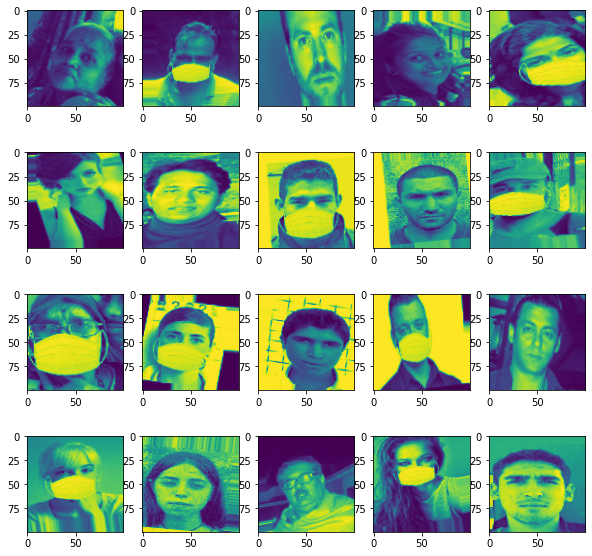

In [33]:
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(X_batch[i].reshape(100,100))
plt.show()

In [34]:
train_target.shape

(1100,)

In [35]:
from keras.utils import to_categorical

In [36]:
train_target=to_categorical(train_target)

In [37]:
test_target=to_categorical(test_target)

In [38]:
train_target.shape

(1100, 2)

In [39]:
test_features.shape

(276, 100, 100, 1)

In [40]:
test_target.shape

(276, 2)

In [41]:
from keras.models import Sequential
from keras.layers import Flatten,Conv2D,MaxPooling2D,Dense,Dropout


# Step 1: Specify the architecture

In [48]:
model=Sequential()
model.add(Conv2D(60,(5,5),activation="relu",input_shape=(100, 100, 1)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(60,(5,5),activation="relu"))
model.add(Conv2D(30,(5,5),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(250,activation="relu"))
model.add(Dense(2,activation="softmax"))

# Step 2: Compile the model

In [49]:
from keras.optimizers import Adam

In [50]:
model.compile(Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Step 3: fit the model

In [51]:
train_features.shape

(1100, 100, 100, 1)

In [52]:
train_target.shape

(1100, 2)

In [53]:
model.fit_generator(dataGenerator.flow(train_features,train_target,batch_size=20),epochs=20)

Epoch 1/20
55/55 [==============================] - 93s 2s/step - loss: 0.9277 - accuracy: 0.5478
Epoch 2/20
55/55 [==============================] - 92s 2s/step - loss: 0.5366 - accuracy: 0.7536
Epoch 3/20
55/55 [==============================] - 94s 2s/step - loss: 0.3766 - accuracy: 0.8400
Epoch 4/20
55/55 [==============================] - 93s 2s/step - loss: 0.3376 - accuracy: 0.8774
Epoch 5/20
55/55 [==============================] - 99s 2s/step - loss: 0.2414 - accuracy: 0.9088
Epoch 6/20
55/55 [==============================] - 114s 2s/step - loss: 0.2448 - accuracy: 0.9082
Epoch 7/20
55/55 [==============================] - 121s 2s/step - loss: 0.2607 - accuracy: 0.8937
Epoch 8/20
55/55 [==============================] - 113s 2s/step - loss: 0.2229 - accuracy: 0.9185
Epoch 9/20
55/55 [==============================] - 104s 2s/step - loss: 0.1781 - accuracy: 0.9412
Epoch 10/20
55/55 [==============================] - 104s 2s/step - loss: 0.1706 - accuracy: 0.9371
Epoch 11/20
55

In [82]:
predictions=model.predict(test_features)

In [83]:
result=np.argmax(predictions,axis=-1)
print(result)

[1 1 0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 0
 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 0
 0 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1]


In [75]:
import numpy as np
import cv2

 

def getClassName(classNo):
    if   classNo == 0: return 'without_mask'
    elif classNo == 1: return 'with_mask'

In [97]:
import cv2
# Load the cascade
face_cascade = cv2.CascadeClassifier('C:/Users/shivs/haarcascade_frontalface_default.xml')
# Read the input image
imgOriginal = cv2.imread('C:/Users/shivs/face.jpg')
# Convert into grayscale
gray = cv2.cvtColor(imgOriginal, cv2.COLOR_BGR2GRAY)
# Detect faces
faces = face_cascade.detectMultiScale(gray, 1.1, 10)
# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(imgOriginal, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow("img",imgOriginal)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    face_img=gray[y:y+h,x:x+w]
# Display the output
cv2.imshow('img', face_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [92]:
face_img.shape

(126, 126)

In [93]:
img_float32 = np.float32(imgOriginal)
gray=cv2.cvtColor(img_float32,cv2.COLOR_BGR2GRAY)
imgOriginal=cv2.resize(gray,(100,100))
imgOriginal=preprocessing(imgOriginal)
img=preprocessing(face_img)
cv2.imshow("Processed Image",face_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
imgOriginal=imgOriginal.reshape(1,100,100,1)
cv2.putText(img,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
cv2.putText(img,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
prediction=model.predict(imgOriginal)
classIndex=np.argmax(prediction,axis=-1)
probabilityValue=np.amax(prediction)
if probabilityValue>0.75:
    cv2.putText(img,str(classIndex) + " "+ str(getClassName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(img,str(round(probabilityValue*100,2)) + "%",(120,150),font,0.75,(0,0,255),2,cv2.LINE_AA)
cv2.imshow("Result",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Code for taking video

In [115]:
import cv2
import numpy as np
cap=cv2.VideoCapture(0)
while True:
    ret,frame=cap.read()
    width=int(cap.get(3))
    height=int(cap.get(4))
    img_float32 = np.float32(frame)
    gray=cv2.cvtColor(img_float32,cv2.COLOR_BGR2GRAY)
    imgOriginal=cv2.resize(gray,(100,100))
    imgOriginal=preprocessing(imgOriginal)
    img=preprocessing(frame)
    imgOriginal=imgOriginal.reshape(1,100,100,1)
    cv2.putText(img,"Class: ",(20,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(img,"Probability: ",(20,75),font,0.75,(0,0,255),2,cv2.LINE_AA)
    prediction=model.predict(imgOriginal)
    classindex=model.predict_classes(imgOriginal)
    classIndex=np.argmax(prediction,axis=-1)
    cv2.putText(img,str(classIndex) + " "+ str(getClassName(classIndex)),(120,35),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.putText(img,str(round(probabilityValue*100,2)) + "%",(120,150),font,0.75,(0,0,255),2,cv2.LINE_AA)
    cv2.imshow("Result",img)
    if (cv2.waitKey(0)& 0xFF)==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[[0.99385047 0.00614948]]
[0]
[0]
[[0.98932844 0.0106715 ]]
[0]
[0]
[[0.5902084 0.4097916]]
[0]
[0]
[[0.99685514 0.00314485]]
[0]
[0]
[[0.99754083 0.00245924]]
[0]
[0]
[[0.99786395 0.0021361 ]]
[0]
[0]
[[0.9968394  0.00316063]]
[0]
[0]
[[0.986878   0.01312204]]
[0]
[0]
[[0.9976676 0.0023323]]
[0]
[0]
[[0.99773407 0.00226595]]
[0]
[0]
[[0.9973865  0.00261346]]
[0]
[0]
[[0.98815143 0.01184864]]
[0]
[0]
[[0.9926755  0.00732454]]
[0]
[0]
[[0.9890954 0.0109046]]
[0]
[0]
[[0.9862487  0.01375134]]
[0]
[0]
[[0.998517   0.00148305]]
[0]
[0]
[[0.9970106  0.00298937]]
[0]
[0]
[[0.9944723  0.00552766]]
[0]
[0]
[[0.9833698  0.01663012]]
[0]
[0]
[[0.9951342  0.00486576]]
[0]
[0]
[[0.98359734 0.01640266]]
[0]
[0]
[[0.9831256  0.01687432]]
[0]
[0]
[[0.98843926 0.01156076]]
[0]
[0]
